<a href="https://colab.research.google.com/github/salmaznn/Big-Data/blob/main/NOTEBOOK_BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***KELOMPOK 6***


*   Salma Zanuba (NIM. 1103220049)
*   Ghefira Diandra Maharani (NIM. 1103223081)
*   Fayza Zahra Putri Hakim (NIM. 1103223111)


# **SCRAPPING DAN INTEGRATION**
Melakukan Scrapping Untuk Aplikasi Traveloka Pada Google Play Store


## Instalasi Library
Bertujuan untuk menginstal *library* eksternal yang dibutuhkan. Kita menggunakan `-q` (quiet) agar output instalasi tidak terlalu ramai.

* `google-play-scraper`: Ini adalah *library* utama yang akan kita gunakan untuk mengambil (scrape) data ulasan langsung dari Google Play Store.

* `pandas`: *Library* ini sangat penting untuk mengolah data. Kita akan menggunakannya untuk mengubah hasil *scraping* menjadi format tabel (disebut DataFrame) agar mudah dianalisis dan disimpan.

In [ ]:
pip install google-play-scraper pandas

## Import Library
Setelah instalasi, bagian ini memanggil *library* yang akan dipakai di sepanjang *notebook*.

* `pandas as pd`: Mengimpor Pandas dan memberinya alias `pd` (ini adalah standar umum) untuk mengelola dataset.\n",
* `reviews_all`, `Sort`: Ini adalah dua fungsi spesifik dari `google-play-scraper`. `reviews_all` digunakan untuk mengambil seluruh ulasan, dan `Sort` untuk menentukan kriteria pengurutan (misalnya, ulasan terbaru atau paling relevan).\n",
* `os`: Singkatan dari Operating System. *Library* ini dipakai untuk berinteraksi dengan sistem file, seperti mendapatkan lokasi absolut dari *file* yang kita simpan."

In [ ]:
import pandas as pd
from google_play_scraper import reviews_all, Sort
import os

## SCRAPING DATA


###Menjalankan Proses Scraping
Ini adalah sel inti untuk mengambil data. Kita memanggil fungsi `reviews_all` dengan beberapa parameter:
* `'com.traveloka.android'`: Ini adalah ID unik aplikasi Traveloka di Google Play Store.
* `lang='id'` & `country='id'`: Memastikan kita hanya mengambil ulasan dalam Bahasa Indonesia dari pengguna di Indonesia.
* `sort=Sort.MOST_RELEVANT`: Mengambil ulasan yang dianggap paling relevan oleh Google (bisa juga diganti `Sort.NEWEST`).
Hasil *scraping* (yang berupa *list*) kemudian langsung diubah menjadi DataFrame Pandas. Kita juga memilih hanya kolom-kolom yang kita butuhkan (`desired_columns`) dan mengganti nama satu kolom agar lebih jelas. Terakhir, data disimpan ke *file* CSV.

In [ ]:
print("Memulai proses scraping ulasan untuk aplikasi Traveloka...")

try:
    # --- PROSES SCRAPING ---
    result = reviews_all(
        'com.traveloka.android',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.MOST_RELEVANT
    )

    print(f"Berhasil mendapatkan {len(result)} ulasan.")
    df_reviews = pd.DataFrame(result)

    desired_columns = [
        'reviewId', 'userName', 'userImage', 'content', 'score',
        'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt'
    ]
    df_final = df_reviews[desired_columns]
    df_final = df_final.rename(columns={'reviewCreatedVersion': 'appVersion'})

    output_filename = 'reviews_traveloka_scraped.csv'
    df_final.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n✅ Proses scraping selesai. Data telah disimpan di file '{output_filename}'")
    print(f"Lokasi file: {os.path.abspath(output_filename)}")

    # --- BAGIAN VERIFIKASI ---
    print("\n--- Verifikasi Isi File ---")
    # Membaca kembali file yang baru saja disimpan untuk memastikan file tidak korup/kosong
    df_verifikasi = pd.read_csv(output_filename)

    # Menampilkan 5 baris pertama dari file CSV yang sudah dibuat
    print("Berikut adalah 5 baris pertama dari data yang berhasil disimpan:")
    display(df_verifikasi.head())

except Exception as e:
    print(f"\n❌ Terjadi kesalahan: {e}")

## MENGGABUNGKAN DATA

###Menggabungkan Data Lama (Batch) dan Data Baru (Stream)
Menggabungkan dua *dataset*
1.  **Data Batch** (`revies_traveloka_googleplaystore.csv`): Ini diasumsikan sebagai data lama yang sudah Anda miliki sebelumnya.
2.  **Data Stream** (`reviews_traveloka_scraped.csv`): Ini adalah data baru yang baru saja kita *scrape* di langkah sebelumnya.
Kita membaca kedua *file* CSV ke dalam DataFrame. Fungsi `pd.concat` digunakan untuk \"menumpuk\" kedua DataFrame tersebut secara vertikal, di mana data baru akan diletakkan di bawah data lama. Hasil gabungan akhirnya disimpan ke *file* baru `data_traveloka_gabungan.csv`.

In [ ]:
import pandas as pd

# Nama file sesuai yang Anda berikan
batch_file = 'revies_traveloka_googleplaystore.csv'
stream_file = 'reviews_traveloka_scraped.csv'
output_file = 'data_traveloka_gabungan.csv'

try:
    print(f"Membaca file batch: {batch_file}")
    # Menambahkan on_bad_lines='skip' untuk melewati baris yang error
    df_batch = pd.read_csv(batch_file, on_bad_lines='skip')

    print(f"Membaca file stream: {stream_file}")
    df_stream = pd.read_csv(stream_file, on_bad_lines='skip')

    print("File berhasil dibaca. Menggabungkan data...")

    # Menggabungkan kedua DataFrame
    df_gabungan = pd.concat([df_batch, df_stream], ignore_index=True)

    # Menyimpan hasil gabungan
    df_gabungan.to_csv(output_file, index=False)

    print(f"\n✅ Penggabungan berhasil! Data telah disimpan di file '{output_file}'.")

except FileNotFoundError as e:
    print(f"\n❌ Error: File tidak ditemukan! Pastikan nama file sudah benar dan file sudah diunggah.")
    print(f"Detail error: {e}")
except Exception as e:
    print(f"\n❌ Terjadi kesalahan lain: {e}")

Membaca file batch: revies_traveloka_googleplaystore.csv

❌ Error: File tidak ditemukan! Pastikan nama file sudah benar dan file sudah diunggah.
Detail error: [Errno 2] No such file or directory: 'revies_traveloka_googleplaystore.csv'


# **PREPROCESSING**

## Import Library
Bagian `import re, numpy as np, pandas as pd` dan import lain memanggil pustaka yang dipakai sepanjang proses preprocessing. Pandas digunakan untuk mengelola dataset, NumPy membantu operasi numerik, sedangkan NLTK dan Sastrawi menangani fungsi khusus pemrosesan teks.

In [ ]:
!pip install -q nltk Sastrawi
import re, numpy as np, pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


## Inisialisasi Stopwords dan Stemmer
Kode `nltk.download('stopwords')` dan blok try–except membuat daftar STOPWORDS bahasa Indonesia, dengan cadangan bahasa Inggris jika korpus Indonesia tidak tersedia. Daftar ini kemudian ditambah kata-kata gaul umum, dan objek STEMMER dibuat dari Sastrawi untuk keperluan stemming kata jika dibutuhkan pada tahap berikutnya.





In [ ]:
nltk.download('stopwords')
try:
    STOPWORDS = set(stopwords.words('indonesian'))
except OSError:
    STOPWORDS = set(stopwords.words('english'))
    STOPWORDS.update([
        "tidak","ya","enggak","nggak","gak","kagak","kok","sih","banget","aja","lah","dong",
        "nih","deh","loh","pun","kan","kayak","kayaknya","jadi","masih","udah","udahh",
        "bener","sekali","bangett"
    ])

STEMMER = StemmerFactory().create_stemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Pemanggilan Dataset
Bagian `CSV_PATH` mendefinisikan lokasi file dan memuat data ulasan Traveloka ke dalam sebuah dataframe. Langkah ini menjadi pintu masuk utama supaya seluruh proses pembersihan teks bekerja pada data yang sama.

In [ ]:
CSV_PATH = "/content/data_traveloka_gabungan.csv"
df = pd.read_csv(
    CSV_PATH,
    engine="python",      # pakai python engine
    on_bad_lines="skip"   # lewati baris yang rusak
)

## Validasi Kolom Teks
Potongan `TEXT_COL = "content"` diikuti pengecekan `if TEXT_COL not in `df.columns memastikan bahwa kolom yang akan diproses memang bernama content dan tersedia di dataset. Jika kolom tidak ditemukan, kode menghentikan proses dengan pesan kesalahan yang jelas agar pengguna segera memperbaiki nama kolom.

In [ ]:
TEXT_COL = "content"
if TEXT_COL not in df.columns:
    raise ValueError("Kolom 'content' tidak ada di dataframe")

## Kamus Slang

In [ ]:
SLANG = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "hubla": "perhubungan laut", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}


## Definisi Pola Regex
Bagian kode yang berisi `URL_RE, MENTION_RE, HASHTAG_RE, HTML_RE, EMOJI_RE, REPEAT_RE, NON_ALPHA_RE, dan MULTISPACE_RE` digunakan untuk mendefinisikan pola pembersihan teks. Masing-masing pola bertugas menghapus elemen yang tidak relevan, seperti tautan, mention, hashtag, tag HTML, emoji, karakter non huruf, pengulangan huruf berlebih, dan spasi ganda. Dengan cara ini, teks ulasan yang masuk ke proses berikutnya sudah jauh lebih bersih dan seragam.

In [ ]:
URL_RE        = re.compile(r"https?://\S+|www\.\S+", re.I)
MENTION_RE    = re.compile(r"@\w+")
HASHTAG_RE    = re.compile(r"#\w+")
HTML_RE       = re.compile(r"<[^>]+>")
EMOJI_RE      = re.compile("[" "\U0001F600-\U0001F64F" "\U0001F300-\U0001F5FF"
                           "\U0001F680-\U0001F6FF" "\U0001F1E0-\U0001F1FF"
                           "\U00002700-\U000027BF" "\U000024C2-\U0001F251" "]+",
                           flags=re.UNICODE)
REPEAT_RE     = re.compile(r"(.)\1{2,}", re.DOTALL)
NON_ALPHA_RE  = re.compile(r"[^a-zA-Z\u00C0-\u02AF\u1E00-\u1EFF\s]")
MULTISPACE_RE = re.compile(r"\s+")

## Fungsi Pembersihan Teks
Fungsi `normalize_slang, remove_stopwords, dan stem_id` disiapkan sebagai fungsi bantu untuk menormalkan kata slang, membuang stopwords, dan melakukan stemming jika diperlukan. Seluruh fungsi bantu tersebut kemudian dipanggil di dalam `clean_text`, yang menjalankan proses pembersihan secara berurutan mulai dari mengubah huruf menjadi lowercase, menghapus pola regex, menormalkan slang, hingga merapikan spasi. Hasil akhirnya adalah teks ulasan yang sudah rapi dan terstandardisasi sehingga siap digunakan pada tahap preprocessing selanjutnya.

In [ ]:
def normalize_slang(t, m):    return " ".join(m.get(w, w) for w in t.split())
def remove_stopwords(t):      return " ".join([w for w in t.split() if w not in STOPWORDS and len(w) > 1])
def stem_id(t):               return STEMMER.stem(t)

def clean_text(t):
    if not isinstance(t, str):
        t = str(t)
    t = t.lower()
    t = URL_RE.sub(" ", t)
    t = MENTION_RE.sub(" ", t)
    t = HASHTAG_RE.sub(" ", t)
    t = HTML_RE.sub(" ", t)
    t = EMOJI_RE.sub(" ", t)
    t = normalize_slang(t, SLANG)
    t = REPEAT_RE.sub(r"\1\1", t)
    t = NON_ALPHA_RE.sub(" ", t)
    t = MULTISPACE_RE.sub(" ", t).strip()
    return t

## Preprocessing
Tahap ini mendefinisikan fungsi preprocess sebagai pipeline utama pembersihan teks dan langsung menerapkannya pada kolom content. Di dalam fungsi, data terlebih dahulu diubah ke tipe string, nilai kosong seperti “nan” dan “None” dihapus, lalu setiap baris teks dibersihkan dengan clean_text, kemudian (sesuai parameter) dapat dibuang stopwords dan bisa juga dilakukan stemming. Setelah itu, teks yang terlalu pendek disaring, hasilnya disusun menjadi DataFrame yang berisi row_id, original_text, dan clean_text, serta ditambah fitur tokens, n_tokens (jumlah kata), dan n_chars (jumlah karakter). Di bagian akhir, fungsi preprocess dipanggil dengan do_stopwords=True dan do_stem=False sehingga teks sudah bersih dan bebas stopwords, tetapi bentuk katanya tetap utuh, lalu disimpan dalam variabel pre_df sebagai data siap pakai untuk analisis berikutnya.

In [ ]:
def preprocess(series,
               dropna=True,
               drop_duplicates=True,
               min_len=3,
               do_stopwords=True,
               do_stem=False):
    s = series.astype(str).copy()
    if dropna:
        s = s.replace(["nan","None"], np.nan).dropna()
    cleaned = s.apply(clean_text)
    if do_stopwords:
        cleaned = cleaned.apply(remove_stopwords)
    if do_stem:
        cleaned = cleaned.apply(stem_id)
    cleaned = cleaned[cleaned.str.len() >= min_len]

    out = pd.DataFrame({
        "row_id": cleaned.index,
        "original_text": s.loc[cleaned.index],
        "clean_text": cleaned
    })
    if drop_duplicates:
        out = out.drop_duplicates(subset=["clean_text"])

    out["tokens"]   = out["clean_text"].str.split()
    out["n_tokens"] = out["tokens"].apply(len)
    out["n_chars"]  = out["clean_text"].str.len()
    return out.reset_index(drop=True)

pre_df = preprocess(df[TEXT_COL], do_stopwords=True, do_stem=False)

## Penggabungan Metadata dan Label
Daftar `want` berisi nama-nama kolom penting dari dataset asli, seperti reviewId, userName, content, score, dan appVersion. Daftar ini difilter menjadi `base_cols` agar hanya kolom yang memang tersedia di dataframe yang diambil. Data hasil preprocessing (`pre_df`) kemudian digabung dengan kolom-kolom tersebut berdasarkan indeks baris (`row_id`) sehingga teks yang sudah bersih tetap memiliki informasi metadata lengkap. Setelah itu, kode mengecek apakah ada kolom label sentimen (misalnya “label”, “sentiment”, atau “polarity”); jika ada, kolom tersebut ikut ditambahkan ke `pre_df`.

In [ ]:
want = [
    "Unnamed: 0","reviewId","userName","userImage","content","score",
    "thumbsUpCount","reviewCreatedVersion","at","replyContent","repliedAt","appVersion"
]
base_cols = [c for c in want if c in df.columns]

pre_df = pre_df.merge(df[base_cols], left_on="row_id", right_index=True, how="left")

# Label jika ada
label_col = next((c for c in ["label","sentiment","polarity","target","y"] if c in df.columns), None)
if label_col:
    pre_df["label"] = df.loc[pre_df["row_id"], label_col].values


## Pengaturan Urutan Kolom
Bagian ini menyusun urutan kolom yang diinginkan melalui variabel `order`, yaitu menggabungkan `base_cols` dengan kolom hasil preprocessing seperti original_text, clean_text, tokens, n_tokens, dan n_chars. Daftar `order` kemudian difilter agar hanya berisi kolom yang benar-benar ada di `pre_df`. Terakhir, dataframe di-reorder mengikuti urutan tersebut sehingga struktur tabel menjadi rapi dan konsisten untuk kebutuhan analisis maupun pelaporan.

In [ ]:
order = base_cols + ["original_text","clean_text","tokens","n_tokens","n_chars"]
order = [c for c in order if c in pre_df.columns]
pre_df = pre_df[order]

## Menyimpan Hasil Preprocessing

In [ ]:
OUT_CSV = "/content/traveloka_preprocessed_nltk.csv"
pre_df.to_csv(OUT_CSV, index=False)

print("Selesai")
print("Baris:", len(pre_df))
print("Kolom:", list(pre_df.columns))
pre_df.head(10)


Selesai
Baris: 56129
Kolom: ['Unnamed: 0', 'reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion', 'original_text', 'clean_text', 'tokens', 'n_tokens', 'n_chars']


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,original_text,clean_text,tokens,n_tokens,n_chars
0,1.0,a51b3420-eef3-4451-adf1-ba3e36acc241,Sry Haty,https://play-lh.googleusercontent.com/a/ACg8oc...,Lebih Memudahkan Untuk Memesan Tiket Saat Ingi...,5.0,0.0,3.88.0,2023-10-22 05:06:35,"Hi Kak, senang banget nih dapat rating bagus d...",2023-10-22 05:12:11,3.88.0,Lebih Memudahkan Untuk Memesan Tiket Saat Ingi...,memudahkan memesan tiket berpergian kemanapun ...,"[memudahkan, memesan, tiket, berpergian, keman...",9,81
1,2.0,fd7e4b05-854a-442c-93be-d04e79962754,Sigit Mamryanto,https://play-lh.googleusercontent.com/a/ACg8oc...,Selalu pakai Traveloka untuk pembelian tiket d...,5.0,0.0,3.88.0,2023-10-22 04:59:50,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-10-22 05:12:16,3.88.0,Selalu pakai Traveloka untuk pembelian tiket d...,pakai traveloka pembelian tiket hotel kemana,"[pakai, traveloka, pembelian, tiket, hotel, ke...",6,44
2,3.0,0dc69506-fe08-4d69-93d9-dfc3b8981393,Awawy Aljawie,https://play-lh.googleusercontent.com/a-/ALV-U...,memudahkan untuk bepergian,5.0,0.0,3.88.0,2023-10-22 04:55:44,"Hi Kak, senang banget nih dapat rating bagus d...",2023-10-22 05:12:19,3.88.0,memudahkan untuk bepergian,memudahkan bepergian,"[memudahkan, bepergian]",2,20
3,5.0,3b2b2d7a-52f0-498d-ba1e-cfe0f69eeb1c,Sumiati,https://play-lh.googleusercontent.com/a-/ALV-U...,The best app nya,5.0,0.0,3.88.0,2023-10-22 04:50:03,"Hi, thank you very much for the positive revie...",2023-10-22 05:12:25,3.88.0,The best app nya,the best app nya,"[the, best, app, nya]",4,16
4,6.0,1d5d15d5-a6d4-4e22-b429-b703ca9f4c13,Riyan Andriansyah,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasinya bagus,5.0,0.0,NaN,2023-10-22 04:38:36,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-10-22 04:42:06,NaN,Aplikasinya bagus,aplikasinya bagus,"[aplikasinya, bagus]",2,17
5,7.0,c390c686-e774-44e1-8649-4fb2c91725d7,Ipah Rahayu,https://play-lh.googleusercontent.com/a-/ALV-U...,Untuk cari tiket akomodasi buat traveling bena...,5.0,0.0,NaN,2023-10-22 04:33:32,"Hi Kak, senang banget nih dapat rating bagus d...",2023-10-22 04:42:09,NaN,Untuk cari tiket akomodasi buat traveling bena...,cari tiket akomodasi traveling mudah pakai tra...,"[cari, tiket, akomodasi, traveling, mudah, pak...",9,65
6,8.0,1a8b72d6-d852-4a71-8c91-426b2d880e3c,Asih Karyati,https://play-lh.googleusercontent.com/a/ACg8oc...,Mempermudah kita untuk beli tiket secara onlin...,5.0,0.0,NaN,2023-10-22 04:31:44,"Hi Kak, terima kasih atas feedbacknya, semoga ...",2023-10-22 04:42:11,NaN,Mempermudah kita untuk beli tiket secara onlin...,mempermudah beli tiket online pokoknya ga ribe...,"[mempermudah, beli, tiket, online, pokoknya, g...",9,57
7,9.0,f8c90ded-8511-4c23-8143-d5c40e6202cf,Ninda Khana,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi andalan untuk keperluan booking tiket...,5.0,0.0,3.70.0,2023-10-22 04:31:30,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-10-22 04:42:13,3.70.0,Aplikasi andalan untuk keperluan booking tiket...,aplikasi andalan keperluan booking tiket pesaw...,"[aplikasi, andalan, keperluan, booking, tiket,...",7,54
8,10.0,52ad09c1-ba2b-4661-bb0e-6cef4f8d3cc2,William Theyer,https://play-lh.googleusercontent.com/a/ACg8oc...,Mau telepon cs aja gk bisa harus by email... P...,1.0,0.0,3.88.0,2023-10-22 03:06:29,"Hai William. Mohon maaf buat kamu kecewa, namu...",2023-10-22 03:23:33,3.88.0,Mau telepon cs aja gk bisa harus by email... P...,telepon cs gk by email refaund jadwal ganti ma...,"[telepon, cs, gk, by, email, refaund, jadwal, ...",9,52
9,11.0,5874c218-aa98-4d6e-9daf-a0347ce02362,Jonathan Cristian,https://play-lh.googleusercontent.com/a-/ALV-U...,Traveloka mantap,5.0,0.0,3.88.0,2023-10-22 02:39:46,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-10-22 02:42:08,3.88.0,Traveloka mantap,traveloka mantap,"[traveloka, mantap]",2,16


In [ ]:
from google.colab import files
files.download("/content/traveloka_preprocessed_nltk.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODELING DAN EVALUATION**
Analisis Sentimen & Pemodelan Ulasan Traveloka

### Setup Awal: Import Library & Memuat Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path = '/content/drive/MyDrive/DATASET/traveloka_preprocessed.csv'
df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,original_text,clean_text,tokens,n_tokens,n_chars
0,1.0,a51b3420-eef3-4451-adf1-ba3e36acc241,Sry Haty,https://play-lh.googleusercontent.com/a/ACg8oc...,Lebih Memudahkan Untuk Memesan Tiket Saat Ingi...,5.0,0.0,3.88.0,2023-10-22 05:06:35,"Hi Kak, senang banget nih dapat rating bagus d...",2023-10-22 05:12:11,3.88.0,Lebih Memudahkan Untuk Memesan Tiket Saat Ingi...,memudahkan memesan tiket berpergian kemanapun ...,"['memudahkan', 'memesan', 'tiket', 'berpergian...",9,81
1,2.0,fd7e4b05-854a-442c-93be-d04e79962754,Sigit Mamryanto,https://play-lh.googleusercontent.com/a/ACg8oc...,Selalu pakai Traveloka untuk pembelian tiket d...,5.0,0.0,3.88.0,2023-10-22 04:59:50,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-10-22 05:12:16,3.88.0,Selalu pakai Traveloka untuk pembelian tiket d...,pakai traveloka pembelian tiket hotel kemana,"['pakai', 'traveloka', 'pembelian', 'tiket', '...",6,44
2,3.0,0dc69506-fe08-4d69-93d9-dfc3b8981393,Awawy Aljawie,https://play-lh.googleusercontent.com/a-/ALV-U...,memudahkan untuk bepergian,5.0,0.0,3.88.0,2023-10-22 04:55:44,"Hi Kak, senang banget nih dapat rating bagus d...",2023-10-22 05:12:19,3.88.0,memudahkan untuk bepergian,memudahkan bepergian,"['memudahkan', 'bepergian']",2,20
3,5.0,3b2b2d7a-52f0-498d-ba1e-cfe0f69eeb1c,Sumiati,https://play-lh.googleusercontent.com/a-/ALV-U...,The best app nya,5.0,0.0,3.88.0,2023-10-22 04:50:03,"Hi, thank you very much for the positive revie...",2023-10-22 05:12:25,3.88.0,The best app nya,the best app nya,"['the', 'best', 'app', 'nya']",4,16
4,6.0,1d5d15d5-a6d4-4e22-b429-b703ca9f4c13,Riyan Andriansyah,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasinya bagus,5.0,0.0,NaN,2023-10-22 04:38:36,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-10-22 04:42:06,NaN,Aplikasinya bagus,aplikasinya bagus,"['aplikasinya', 'bagus']",2,17


In [ ]:
df.info()
df['score'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83303 entries, 0 to 83302
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            73367 non-null  float64
 1   reviewId              83303 non-null  object 
 2   userName              83303 non-null  object 
 3   userImage             83303 non-null  object 
 4   content               83303 non-null  object 
 5   score                 83303 non-null  float64
 6   thumbsUpCount         83303 non-null  float64
 7   reviewCreatedVersion  54532 non-null  object 
 8   at                    83303 non-null  object 
 9   replyContent          44898 non-null  object 
 10  repliedAt             44903 non-null  object 
 11  appVersion            62499 non-null  object 
 12  original_text         83303 non-null  object 
 13  clean_text            83303 non-null  object 
 14  tokens                83303 non-null  object 
 15  n_tokens           

,score
count,83303.000000
mean,3.786718
std,1.631364
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,9936
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,28771
at,0
replyContent,38405


## KLASIFIKASI KELUHAN
 Mengklasifikasikan ulasan negatif (skor 1 dan 2) ke dalam beberapa kategori keluhan (Pelayanan, Aplikasi, Pembayaran, Booking, Lainnya) berdasarkan kata kunci.

In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.metrics import (
    classification_report, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("traveloka_preprocessed.csv")

# Memilih Kolom yang Dibutuhkan
df_filtered = df[['score', 'clean_text', 'tokens']].dropna()

# Filter untuk ulasan negatif (score ≤ 2) ===
df_negative = df_filtered[df_filtered['score'] <= 2]
print(f"Total ulasan negatif: {len(df_negative)}")

# Mendefinisikan kategori_keluhan secara manual
kategori_keluhan = {
    'Pelayanan': [
        'layan', 'service', 'staff', 'respon', 'lambat', 'kasar',
        'bantu', 'tidak ramah', 'sopan', 'tidak sopan', 'cuek',
        'tidak membantu', 'acuh', 'marah', 'tidak profesional', 'pelayanan buruk'
    ],

    'Aplikasi/Sistem': [
        'aplikasi', 'sistem', 'error', 'bug', 'loading', 'crash',
        'lemot', 'hang', 'gagal', 'force close', 'update', 'versi',
        'tidak bisa login', 'macet', 'lag', 'fitur hilang', 'tutup sendiri'
    ],

    'Pembayaran': [
        'bayar', 'refund', 'uang', 'tagih', 'biaya', 'harga', 'saldo',
        'pembayaran', 'kartu', 'transfer', 'topup', 'va', 'rekening',
        'potong', 'gagal bayar', 'belum dikembalikan', 'double charge',
        'tidak sesuai harga'
    ],

    'Booking': [
        'pesan', 'book', 'reservasi', 'batal', 'konfirmasi', 'jadwal',
        'tiket', 'checkin', 'checkout', 'cancel', 'kode booking',
        'tidak muncul', 'booking gagal', 'pesanan hilang'
    ]
}

Total ulasan negatif: 21140


In [ ]:
# Labeling Berdasarkan Tokens
def label_keluhan(tokens):
    text = str(tokens).lower()
    for kategori, keywords in kategori_keluhan.items():
        for kata in keywords:
            if kata in text:
                return kategori
    return 'Lainnya'

df_negative['kategori_keluhan'] = df_negative['tokens'].apply(label_keluhan)

# Cek Distribusi Label
print("\nDistribusi kategori:")
print(df_negative['kategori_keluhan'].value_counts())

# Proses Encoding Fitur Text (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df_negative['clean_text'])
y = df_negative['kategori_keluhan']

/tmp/ipython-input-3654226075.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['kategori_keluhan'] = df_negative['tokens'].apply(label_keluhan)



Distribusi kategori:
kategori_keluhan
Lainnya            6404
Aplikasi/Sistem    5319
Pembayaran         4754
Pelayanan          2945
Booking            1718
Name: count, dtype: int64


In [ ]:
# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


==================== NAIVE BAYES ====================

Akurasi (Naive Bayes): 0.7360
Precision: 0.7524 | Recall: 0.7360 | F1-score: 0.7216

Laporan Klasifikasi (Naive Bayes):
                 precision    recall  f1-score   support

Aplikasi/Sistem       0.68      0.75      0.71      1064
        Booking       0.80      0.22      0.34       343
        Lainnya       0.79      0.89      0.84      1281
      Pelayanan       0.91      0.56      0.69       589
     Pembayaran       0.66      0.81      0.73       951

       accuracy                           0.74      4228
      macro avg       0.77      0.65      0.66      4228
   weighted avg       0.75      0.74      0.72      4228



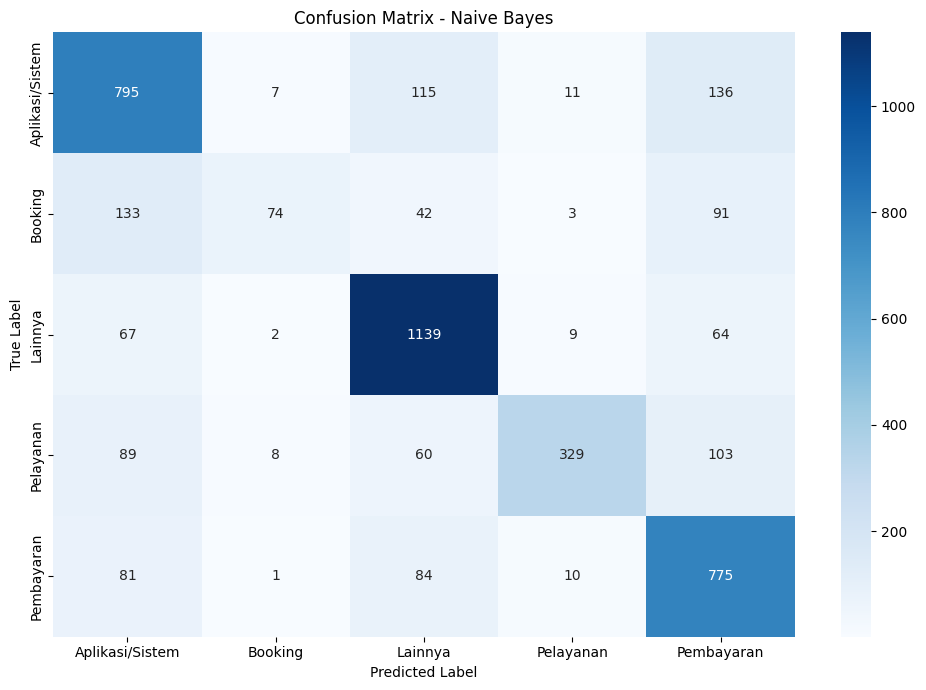

In [ ]:

# NAIVE BAYES
print("\n==================== NAIVE BAYES ====================")
nb_model = MultinomialNB(alpha=1.5)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi Naive Bayes
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb, average='weighted')
rec_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f"\nAkurasi (Naive Bayes): {acc_nb:.4f}")
print(f"Precision: {prec_nb:.4f} | Recall: {rec_nb:.4f} | F1-score: {f1_nb:.4f}")
print("\nLaporan Klasifikasi (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix Naive Bayes
plt.figure(figsize=(10,7))
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


==================== SVM ====================

Akurasi (SVM): 0.9305
Precision: 0.9323 | Recall: 0.9305 | F1-score: 0.9303

Laporan Klasifikasi (SVM):
                 precision    recall  f1-score   support

Aplikasi/Sistem       0.96      0.92      0.94      1064
        Booking       0.84      0.89      0.87       343
        Lainnya       0.92      0.99      0.96      1281
      Pelayanan       0.99      0.87      0.93       589
     Pembayaran       0.91      0.91      0.91       951

       accuracy                           0.93      4228
      macro avg       0.92      0.92      0.92      4228
   weighted avg       0.93      0.93      0.93      4228



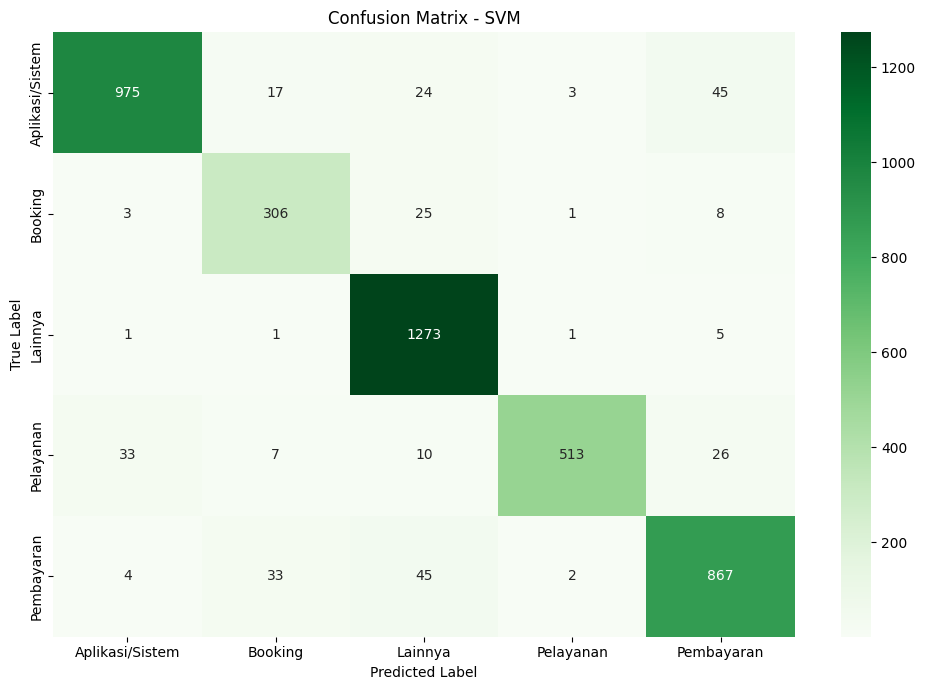

In [ ]:
# SVM
print("\n==================== SVM ====================")
svm_model = LinearSVC(random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi SVM
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
rec_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"\nAkurasi (SVM): {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f} | Recall: {rec_svm:.4f} | F1-score: {f1_svm:.4f}")
print("\nLaporan Klasifikasi (SVM):")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix SVM
plt.figure(figsize=(10,7))
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

##Regresi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("traveloka_preprocessed.csv")

# Pilih Kolom/Fitur yang akan digunakan
df_filtered = df[['score', 'clean_text', 'n_tokens', 'n_chars', 'thumbsUpCount']].dropna()

In [ ]:
# Proses Encoding Fitur Text (TF-IDF)
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_text = vectorizer.fit_transform(df_filtered['clean_text'])

# Menggabungkan Fitur Numerik dan Teks
from scipy.sparse import hstack
X_numeric = df_filtered[['n_tokens', 'n_chars', 'thumbsUpCount']].values
X = hstack([X_text, X_numeric])

y = df_filtered['score']

In [ ]:
# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# REGRESI LINEAR
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# RANDOM FOREST REGRESSOR
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n==================== {model_name} ====================")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")


==================== Linear Regression ====================
Mean Absolute Error (MAE): 0.780
Root Mean Squared Error (RMSE): 1.070
R² Score: 0.574

==================== Random Forest Regressor ====================
Mean Absolute Error (MAE): 0.772
Root Mean Squared Error (RMSE): 1.153
R² Score: 0.505

==================== XGBoost Regressor ====================
Mean Absolute Error (MAE): 0.828
Root Mean Squared Error (RMSE): 1.110
R² Score: 0.542


##Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
features = ['n_tokens', 'n_chars', 'thumbsUpCount', 'score']
data = df[features].copy()
data = data.fillna(0)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

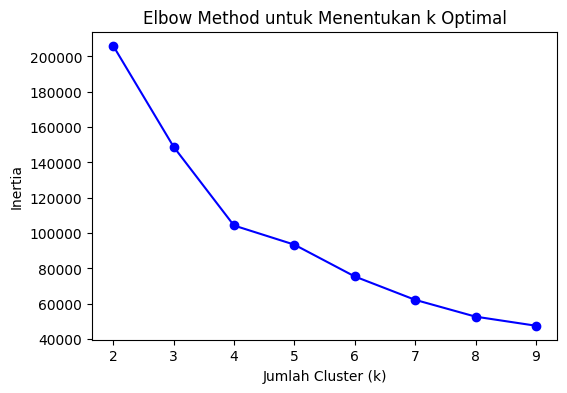

In [ ]:
# Menentukan Jumlah Cluster (Gunakan Elbow Method)
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

k = 2: Silhouette Score = 0.610
k = 3: Silhouette Score = 0.571
k = 4: Silhouette Score = 0.575
k = 5: Silhouette Score = 0.576
k = 6: Silhouette Score = 0.563
k = 7: Silhouette Score = 0.550
k = 8: Silhouette Score = 0.517
k = 9: Silhouette Score = 0.468


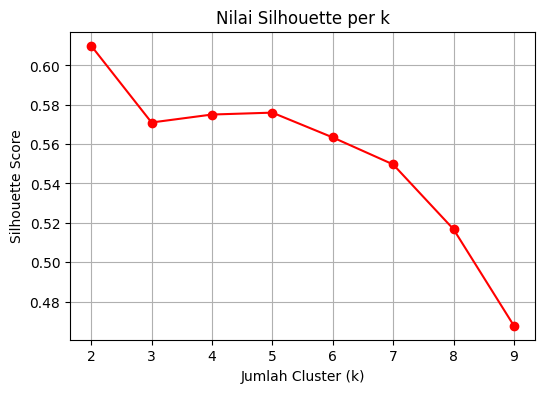

In [ ]:
silhouette_list = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_list.append(score)
    print(f"k = {k}: Silhouette Score = {score:.3f}")

# Plot Silhouette Score
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_list, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Nilai Silhouette per k')
plt.grid(True)
plt.show()


Rata-rata Tiap Fitur per Cluster:
         n_tokens  n_chars  thumbsUpCount  score
Cluster                                         
0            8.22    55.25           1.62   1.40
1            4.80    33.55           0.97   4.76
2           27.72   193.67          18.50   2.24
3           26.00   186.14        1966.00   4.14
4           22.24   161.17         575.88   3.64


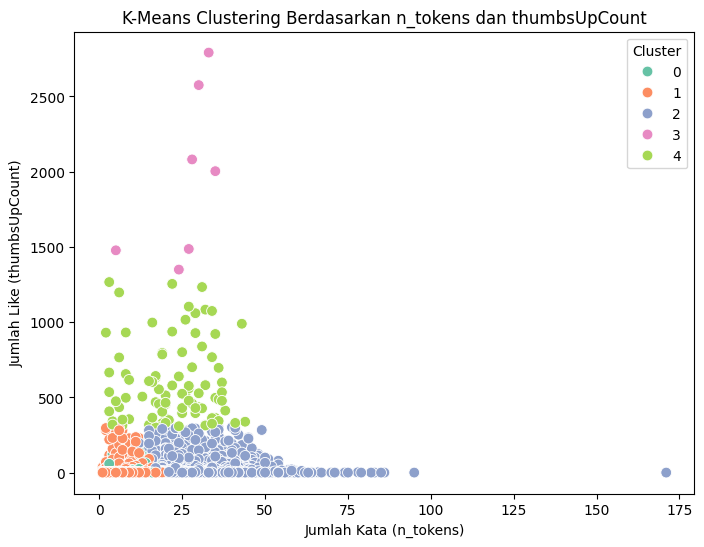

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Analisis Rata-Rata Setiap Cluster
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("\nRata-rata Tiap Fitur per Cluster:")
print(cluster_summary)

# Visualisasi dua fitur utama
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='n_tokens', y='thumbsUpCount',
    hue='Cluster', palette='Set2', data=df, s=60
)
plt.title('K-Means Clustering Berdasarkan n_tokens dan thumbsUpCount')
plt.xlabel('Jumlah Kata (n_tokens)')
plt.ylabel('Jumlah Like (thumbsUpCount)')
plt.legend(title='Cluster')
plt.show()

k = 2: Inertia = 206098.03, Silhouette = 0.610, Davies-Bouldin = 0.860
k = 3: Inertia = 148945.09, Silhouette = 0.571, Davies-Bouldin = 0.791
k = 4: Inertia = 104347.75, Silhouette = 0.575, Davies-Bouldin = 0.685

Hasil Evaluasi KMeans:
   k     Inertia  Silhouette  Davies_Bouldin
0  2  206098.028       0.610           0.860
1  3  148945.090       0.571           0.791
2  4  104347.754       0.575           0.685


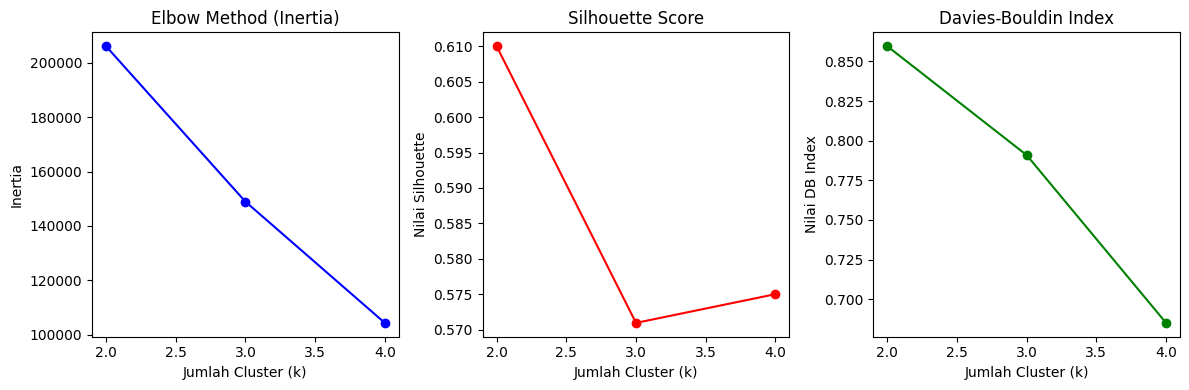

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Evaluasi K-Means untuk berbagai nilai k
inertia_list = []
silhouette_list = []
db_index_list = []

K = range(2, 5)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(data_scaled, cluster_labels)
    db_index = davies_bouldin_score(data_scaled, cluster_labels)

    inertia_list.append(inertia)
    silhouette_list.append(silhouette)
    db_index_list.append(db_index)

    print(f"k = {k}: Inertia = {inertia:.2f}, Silhouette = {silhouette:.3f}, Davies-Bouldin = {db_index:.3f}")


# Buat DataFrame hasil evaluasi
eval_df = pd.DataFrame({
    'k': list(K),
    'Inertia': inertia_list,
    'Silhouette': silhouette_list,
    'Davies_Bouldin': db_index_list
})

print("\nHasil Evaluasi KMeans:")
print(eval_df.round(3))

# Visualisasi Metrik
plt.figure(figsize=(12,4))

# Plot Inertia (Elbow)
plt.subplot(1,3,1)
plt.plot(K, inertia_list, 'bo-')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1,3,2)
plt.plot(K, silhouette_list, 'ro-')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Nilai Silhouette')

# Plot Davies-Bouldin Index
plt.subplot(1,3,3)
plt.plot(K, db_index_list, 'go-')
plt.title('Davies-Bouldin Index')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Nilai DB Index')

plt.tight_layout()
plt.show()


=== Perbandingan GMM (2–9 Cluster) ===
k = 2 → Silhouette Score = 0.453
k = 3 → Silhouette Score = 0.355
k = 4 → Silhouette Score = 0.349
k = 5 → Silhouette Score = 0.326
k = 6 → Silhouette Score = 0.196
k = 7 → Silhouette Score = 0.289
k = 8 → Silhouette Score = 0.242
k = 9 → Silhouette Score = 0.190

Jumlah cluster terbaik (GMM): 2 dengan Silhouette Score = 0.453

==================== GAUSSIAN MIXTURE MODEL ====================
Silhouette Score (GMM): 0.349

Rata-rata Tiap Fitur per Cluster (GMM):
             n_tokens  n_chars  thumbsUpCount  score
GMM_Cluster                                         
0.0              6.16    41.52           0.35   2.35
1.0              4.28    29.88           0.00   4.85
2.0             16.42   113.87           2.96   2.88
3.0             24.08   169.87          63.95   2.59


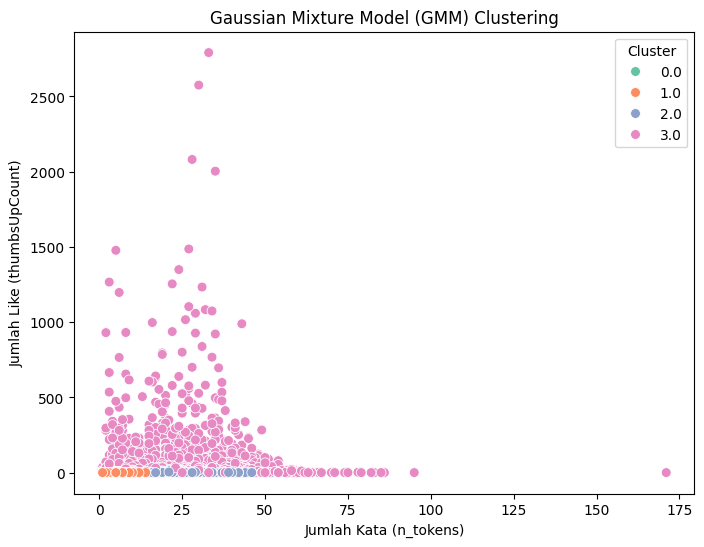

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

sil_scores_gmm = []

print("=== Perbandingan GMM (2–9 Cluster) ===")
for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(data_scaled)
    sil = silhouette_score(data_scaled, labels)
    sil_scores_gmm.append(sil)
    print(f"k = {k} → Silhouette Score = {sil:.3f}")

best_k = sil_scores_gmm.index(max(sil_scores_gmm)) + 2
print(f"\nJumlah cluster terbaik (GMM): {best_k} dengan Silhouette Score = {max(sil_scores_gmm):.3f}")

# GAUSSIAN MIXTURE MODEL (GMM)
print("\n==================== GAUSSIAN MIXTURE MODEL ====================")

# Menentukan jumlah cluster (dari silhouette sebelumnya)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

df['GMM_Cluster'] = np.nan
df.loc[data.index, 'GMM_Cluster'] = gmm_labels

# Evaluasi GMM
sil_gmm = silhouette_score(data_scaled, gmm_labels)
print(f"Silhouette Score (GMM): {sil_gmm:.3f}")

# Ringkasan tiap cluster
cluster_summary_gmm = df.groupby('GMM_Cluster')[features].mean().round(2)
print("\nRata-rata Tiap Fitur per Cluster (GMM):")
print(cluster_summary_gmm)

# Visualisasi GMM
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='n_tokens', y='thumbsUpCount',
    hue='GMM_Cluster', palette='Set2', data=df, s=50
)
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('Jumlah Kata (n_tokens)')
plt.ylabel('Jumlah Like (thumbsUpCount)')
plt.legend(title='Cluster')
plt.show()
